In [1]:
import os
import json
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [2]:
# function code from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
# Read training and test data

categories = set()
top_level_categories = set()

train_X = []
train_specific_Y = []
train_top_Y = []
with open(os.path.join('..', 'features', 'nouns', '2016.json'), 'r') as f:
    for line in f:
        row = json.loads(line)
        
        train_X.append(row['nouns'])
        train_specific_Y.append(row['categories'])
        train_top_Y.append(row['top_level_categories'])
        
        for category in row['categories']:
            categories.add(category)
        
        for category in row['top_level_categories']:
            top_level_categories.add(category)

test_X = []
test_specific_Y = []
test_top_Y = []    
with open(os.path.join('..', 'features', 'nouns', '2017.json'), 'r') as f:
    for line in f:
        row = json.loads(line)
        
        test_X.append(row['nouns'])
        test_specific_Y.append(row['categories'])
        test_top_Y.append(row['top_level_categories'])
        
        for category in row['categories']:
            categories.add(category)
        
        for category in row['top_level_categories']:
            top_level_categories.add(category)

In [11]:
# get sorted list of categories
top_level_categories = list(top_level_categories)
top_level_categories.sort()

# binarize training and test labels
mlb = MultiLabelBinarizer(top_level_categories)
bin_train_top_Y = mlb.fit_transform(train_top_Y)
bin_test_top_Y = mlb.fit_transform(test_top_Y)

In [35]:
### One vs rest classifier
### Features: TFIDF (top 10000 nouns from the WHOLE training set)

pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features = 10000)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),
            ])

predictions_all_tfidf = []
for i in range(len(top_level_categories)):
    print('{}'.format(mlb.classes_[i].upper()))
    pipeline.fit(train_X, bin_train_top_Y[: ,i])
    
    prediction = pipeline.predict(test_X)
    predictions_all_tfidf.append(prediction)
    
    print('Instances: {}'.format(np.sum(bin_test_top_Y[:,i])))
    print('Test accuracy is {0:.2f}'.format(accuracy_score(bin_test_top_Y[:,i], prediction)))
    print('Precision is {0:.2f}'.format(precision_score(bin_test_top_Y[:,i], prediction)))
    print('Recall is {0:.2f}\n'.format(recall_score(bin_test_top_Y[:,i], prediction)))

ASTRO-PH
Instances: 15127
Test accuracy is 0.98
Precision is 0.94
Recall is 0.86

COND-MAT
Instances: 17576
Test accuracy is 0.95
Precision is 0.81
Recall is 0.81

CS
Instances: 30686
Test accuracy is 0.93
Precision is 0.83
Recall is 0.89

ECON
Instances: 109
Test accuracy is 1.00
Precision is 0.00
Recall is 0.00

EESS


/Users/ischool-user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Instances: 698
Test accuracy is 0.99
Precision is 0.00
Recall is 0.00

GR-QC


/Users/ischool-user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Instances: 4589
Test accuracy is 0.98
Precision is 0.77
Recall is 0.50

HEP-EX
Instances: 2514
Test accuracy is 0.98
Precision is 0.54
Recall is 0.63

HEP-LAT
Instances: 1044
Test accuracy is 0.99
Precision is 0.93
Recall is 0.05

HEP-PH
Instances: 6539
Test accuracy is 0.97
Precision is 0.74
Recall is 0.73

HEP-TH
Instances: 6209
Test accuracy is 0.97
Precision is 0.75
Recall is 0.57

MATH
Instances: 38456
Test accuracy is 0.91
Precision is 0.86
Recall is 0.86

MATH-PH
Instances: 3765
Test accuracy is 0.97
Precision is 0.58
Recall is 0.05

NLIN
Instances: 1834
Test accuracy is 0.99
Precision is 0.91
Recall is 0.03

NUCL-EX
Instances: 1216
Test accuracy is 0.99
Precision is 0.67
Recall is 0.22

NUCL-TH
Instances: 2301
Test accuracy is 0.98
Precision is 0.55
Recall is 0.28

PHYSICS
Instances: 14548
Test accuracy is 0.91
Precision is 0.71
Recall is 0.45

Q-BIO
Instances: 2482
Test accuracy is 0.98
Precision is 0.76
Recall is 0.26

Q-FIN
Instances: 895
Test accuracy is 0.99
Precision is 0

In [38]:
transpose_predictions_all_tfidf = np.transpose(np.asarray(predictions_all_tfidf))
predictions = mlb.inverse_transform(transpose_predictions_all_tfidf)

In [48]:
#compute accuracy, precision, and recall
exact_match = 0
accuracy = 0
precision = 0
recall = 0

for i in range(len(predictions)):
    y = set(test_top_Y[i])
    z = set(predictions[i])
    
    if y == z:
        exact_match += 1
    
    accuracy += len(y.intersection(z)) / len(y.union(z))
    
    if len(z) > 0:
        precision += len(y.intersection(z)) / len(z)
    recall += len(y.intersection(z)) / len(y)
    
exact_match /= len(predictions)
accuracy /= len(predictions)
precision /= len(predictions)
recall /= len(predictions)

print('Exact match: {0:.2f}'.format(exact_match))
print('Accuracy: {0:.2f}'.format(accuracy))
print('Precision: {0:.2f}'.format(precision))
print('Recall: {0:.2f}'.format(recall))

Exact match: 0.59
Accuracy: 0.71
Precision: 0.78
Recall: 0.77


In [34]:
true_predictions = np.sum(bin_test_top_Y + transpose_predictions_all_tfidf == 2)
all_predictions = np.count_nonzero(transpose_predictions_all_tfidf)
total_labels = np.count_nonzero(bin_test_top_Y)

print('Exact match: {0:.2f}'.format((len(bin_test_top_Y) - np.count_nonzero(np.sum(bin_test_top_Y != transpose_predictions_all_tfidf, axis = 1))) / len(bin_test_top_Y)))
print('Precision: {0:.2f}'.format(true_predictions/total_labels))
print('Recall: {0:.2f}'.format(true_predictions/all_predictions))

Exact match: 0.59
Precision: 0.70
Recall: 0.82


/Users/ischool-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Normalized confusion matrix


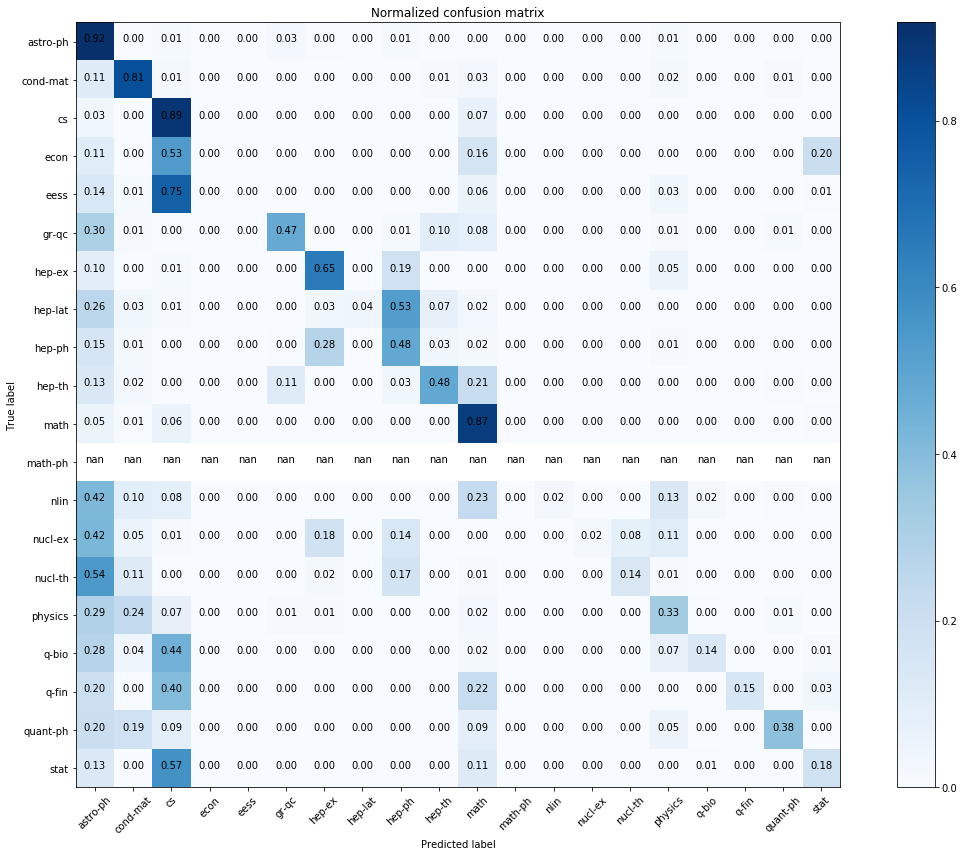

In [14]:
cnf_matrix = confusion_matrix(list(bin_test_top_Y.argmax(axis=1)), list(transpose_predictions_all_tfidf.argmax(axis=1)))

plt.figure(figsize=(16,12))
plot_confusion_matrix(cnf_matrix, classes=top_level_categories, normalize=True, title='Normalized confusion matrix')
plt.show()

In [15]:
len(list(transpose_predictions_all_tfidf.argmax(axis=1)))
len(test_X)

123781

In [ ]:
transpose_predictions_all_tfidf = np.transpose(np.asarray(predictions_all_tfidf))
cnf_matrix = confusion_matrix(list(bin_test_top_Y.argmax(axis=1)), list(transpose_predictions_all_tfidf.argmax(axis=1)))
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=top_level_categories,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(16,12))
plot_confusion_matrix(cnf_matrix, classes=top_level_categories, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



In [ ]:
nb_predictions = []

for i in range(len(categories)):
    print('... Processing {}'.format(mlb.classes_[i]))

    vectorizer = TfidfVectorizer(max_features = 5000)
    tfidf_matrix =  vectorizer.fit_transform(np.array(train_X)[bin_train_Y[:,i] == 1])
    
    clf = MultinomialNB(fit_prior=True, class_prior=None)
    clf.fit(vectorizer.transform(train_X), bin_train_Y[:,i])
    
    # compute the testing accuracy
    prediction = clf.predict(vectorizer.transform(test_X))
    nb_predictions.append(prediction)
    
    print('Instances: {}'.format(np.sum(bin_test_Y[:,i])))
    print('Test accuracy is {%.2f}'.format(accuracy_score(bin_test_Y[:,i], prediction)))
    print('Precision is {}'.format(precision_score(bin_test_Y[:,i], prediction)))
    print('Recall is {}'.format(recall_score(bin_test_Y[:,i], prediction)))